## TENSORFLOW REGRESSION

In the following model we are completing a ytask o predicting whether a customer will churn or not using tensorflow.We will optimize the perfomance of our model using a technique called stopping that  stops training the model onceour model  validation accuracy starts to decrease

In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.9.1


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In the following notebooks we will operating with two dataframes but contain the same dataset .We will be having the 'dataset'that contains the original dataset and we will be having the df that will be having only the numerical columns so that we can see the influence of different columns on our target columns which is the 'Exited' column.

In [68]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [70]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
dataset.isnull().sum().sum()

0

In [80]:
cols = [
   "CreditScore", 
    "Age", "Tenure", "Balance", "NumOfProducts",
    "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"
]


In [81]:
dataset['Exited'].unique()

array([1, 0], dtype=int64)

In the following code we will create a dataframe called df which will contain all the numerical columns .You might wonder why we wont encode the gender column but this may bring a bias to our model based on the gender column

In [77]:
df = dataset.drop(columns=["Surname", "Gender","Geography","RowNumber","CustomerId"], axis=1)


In [82]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In the following we will be assessing the influence of our indipendent numerical columns on our dependent variable and we will be having the summaey below it

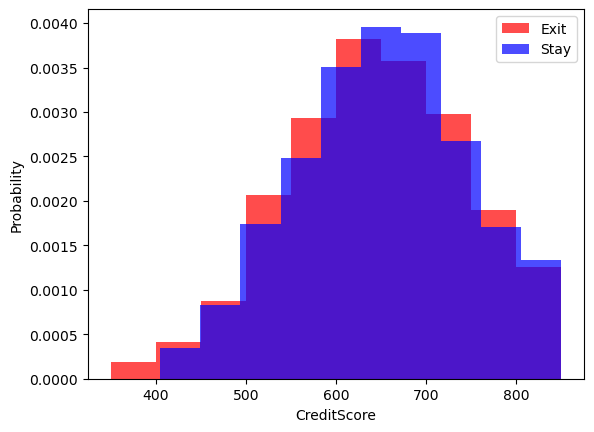

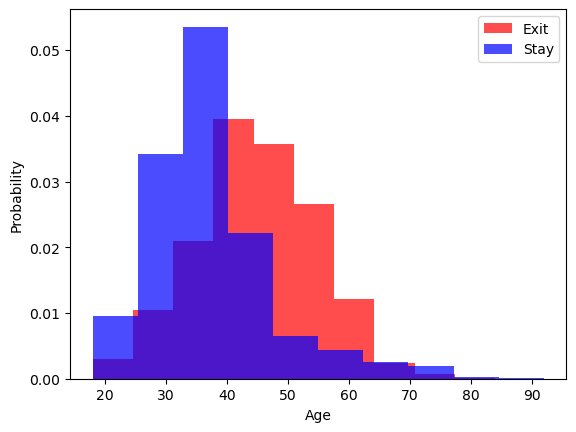

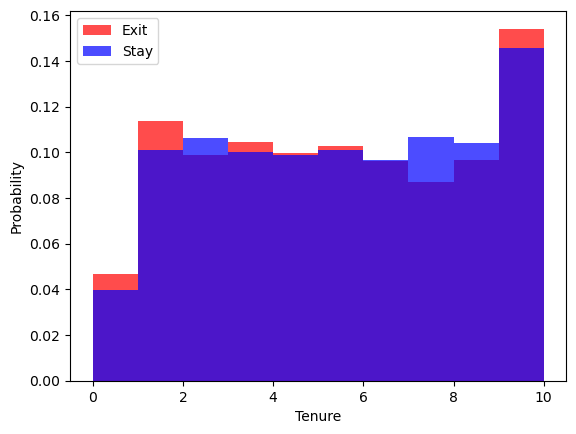

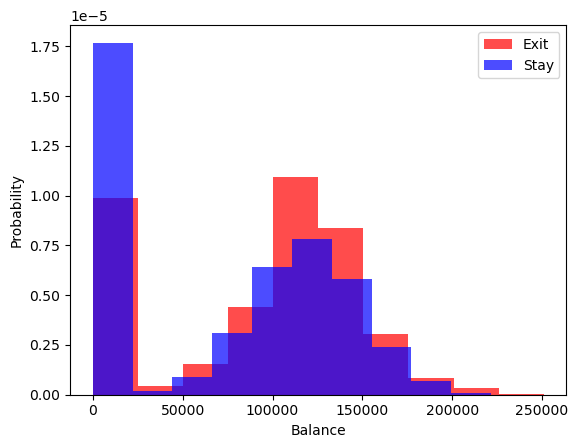

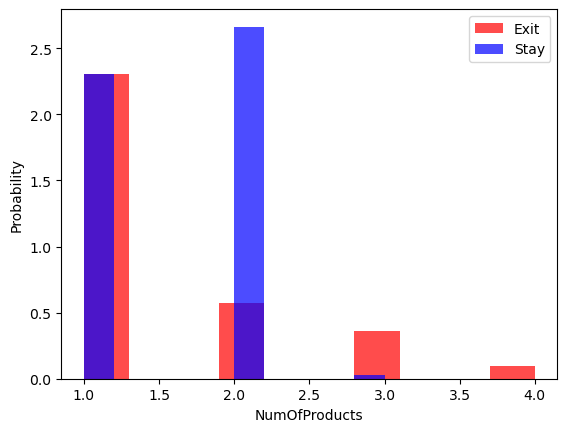

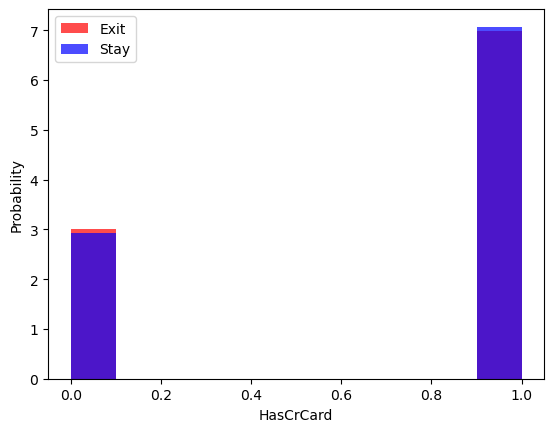

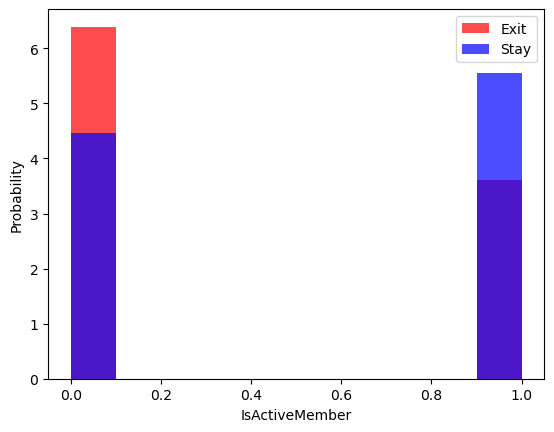

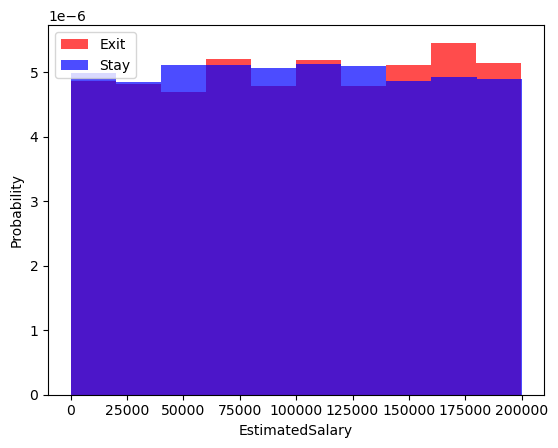

In [85]:
for label in cols[:-1]:
  plt.hist(df[df['Exited']==1][label],color ='red',label ='Exit',alpha =0.7,density =True)
  plt.hist(df[df['Exited']==0][label],color ='blue',label ='Stay',alpha =0.7,density =True)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

## We will be having a summary of each column
  CREDIT SCORE   -As the credit score increases so does the likelihood that someone wil actually stay in the bank , could the issue be mostly they have easy access to credit and mostly the interest on credit and also the term sof payment of credit would definitely be favourable for someone with a higher credit rating.
  AGE -With the above datset we have people with ages 20-40 are most likely to stay and be left at the bank,could this be because they are earning and employed or it could be people with a higher age  after 60 dont have a means of payment and thus more likely o leave the bank.
  TENURE -Refers to the amount of time that the customer has been at the bank and poeple with a higher tenure at the bank are most likely then to stay at the bank
  

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [62]:
#Create dummy variables form of one hor=t encding

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [64]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Start coding the ANN

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

We will be fitting the model and also including early stopping to our model to stop training once our model starts to perfom well on our dataset

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    restore_best_weights=True  # Use this parameter to restore weights from the best epoch
)


In [34]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 7s 9ms/step - loss: 0.3539 - accuracy: 0.8582 - val_loss: 0.4479 - val_accuracy: 0.8470
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3504 - accuracy: 0.8565 - val_loss: 0.4364 - val_accuracy: 0.8489
Epoch 3/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3555 - accuracy: 0.8578 - val_loss: 0.4256 - val_accuracy: 0.8342
Epoch 4/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3877 - accuracy: 0.8492 - val_loss: 0.4536 - val_accuracy: 0.8277
Epoch 5/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4025 - accuracy: 0.8457 - val_loss: 0.4118 - val_accuracy: 0.8417
Epoch 6/100
536/536 [==============================] - 7s 14ms/step - loss: 0.3662 - accuracy: 0.8531 - val_loss: 0.4138 - val_accuracy: 0.8440
Epoch 7/100
536/536 [==============================] - 5s 8ms/step - loss: 0.3643 - accuracy: 0.8561 - val_loss: 0.4060 - val_accuracy: 0.8

In [36]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


We will look at the perfomance of our model and evaluate it to see how our test and traina accuracy compares

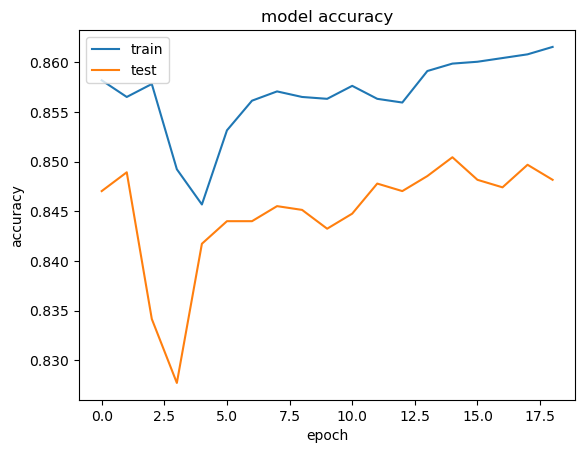

In [37]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can see our model is not overfittingan dits perfoming very well since our train and test accuracy is very clodse to one another

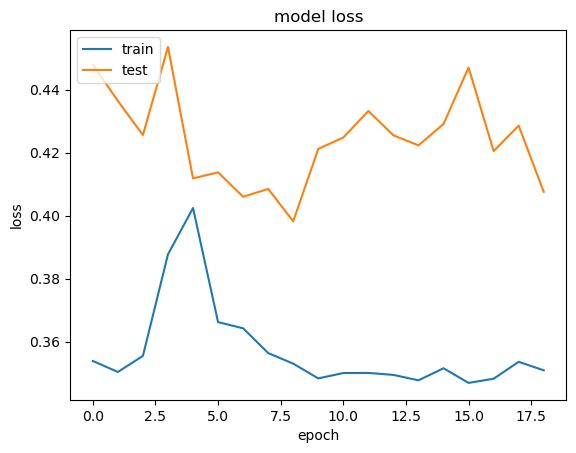

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
And as we can see the loss is decreasing steadily thus the model is definitely perfoming well

In [40]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 2s 6ms/step


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   81],
       [ 202,  203]], dtype=int64)

In [45]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [46]:
score

0.8585

The accuracy of our model is about 86 percent thus our model is perfoming considerably very well for a model that is predicting whether a customer will churn it  would be a very good model that would really help in retaining alot of customers